<a href="https://colab.research.google.com/github/DmitryiLaptev/Tinkoff_data_analysis/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_2_(%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Шаблон для проекта по A/B - тестам.

### `chat_id ` из Телеграма:

In [ ]:
766298455

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import mannwhitneyu, ks_2samp, probplot, norm, ttest_ind, cramervonmises_2samp

------------------

##  <ins>Задание 1.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

Контекст

Мы много платим оператору из-за того,
что он сам по каждому заданию
звонит клиенту и ждёт ответа клиента.
Мы хотим попробовать снизить затраты на операторов,
внедрив систему,
которая будет сама звонить человеку
и в случае успеха перенаправлять задание оператору.
        
Тест

Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) мы продаём 
без автоматической системы дозвона,
а второй части (тесту) - с ней.
Целью этого теста
является снижение расходов на задание.

Статистические вводные

Уровень значимости 5%.
Мы хотели бы различать 5%-ное 
изменение целевой метрики
с вероятностью 90%.

### 1. Необходимо выбрать метрику и привести аргументацию.

Целевой метрикой для данного A/B теста является **NPV (чистая прибыль)**, так как наша задача - снижение расходов на задание без ущерба для продаж. Мы хотим определить, снижает ли автоматическая система дозвона расходы и увеличивает NPV, не влияя на продажи.

### 2. Альтернатива в критерии.

*   Нулевая гипотеза (H0): автоматическая система дозвона не влияет на NPV.
*   Альтернативная гипотеза (H1): автоматическая система дозвона увеличивает NPV на 5% или более.



### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Загрузим исторические данные. Определим среднее значение (µ) и стандартное отклонение (σ) для NPV.

Определим уровень значимости (α) и мощность критерия (1 - β). В данном случае, α = 0.05 и мощность критерия равна 90%, что означает β = 1 - 0.9 = 0.1.

Рассчитаем допустимую ошибку (Δ) для изменения в 5% от среднего значения NPV:

*   Δ = 0.05 * µ

Найдем Z-оценки для заданных уровней значимости (Zα/2) и мощности критерия (Zβ):

*   Zα/2 ≈ 1.96 (при α = 0.05)
*   Zβ ≈ 1.28 (при β = 0.1)

Используем формулу для расчета минимального размера выборки (n):

*   n = ((Zα/2 + Zβ) * σ / Δ)²

где Zα/2 - квантиль нормального распределения для уровня значимости α/2, Zβ - квантиль нормального распределения для уровня мощности 1-β, σ - стандартное отклонение NPV, Δ - допустимая ошибка.

Округлим полученный результат вверх до ближайшего целого числа, чтобы получить минимальный размер выборки (n) для каждой группы (контрольной и тестовой).


In [ ]:
hist_telesales = pd.read_csv('hist_telesales.csv', index_col='ID')

In [ ]:
def calculate_sample_size(data, alpha=0.05, beta=0.1, target_change=0.05):
    # Расчет среднего значения и стандартного отклонения для NPV
    mean_npv = data['NPV'].mean()
    std_npv = data['NPV'].std()
    
    # Расчет допустимой ошибки (E)
    delta = target_change * mean_npv
    
    # Расчет Z-оценок для заданных уровней значимости и мощности
    z_alpha_2 = stats.norm.ppf(1 - alpha / 2)
    z_beta = stats.norm.ppf(1 - beta)
    
    # Расчет минимального размера выборки (n)
    n = math.ceil(((z_alpha_2 + z_beta) * std_npv / delta) ** 2)
    
    return n

In [ ]:
sample_size = calculate_sample_size(hist_telesales)
print(f"Минимальный размер выборки: {sample_size}")

Минимальный размер выборки: 24365


### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
41945

In [ ]:
test = pd.read_csv('Тест.csv', index_col='ID')
control = pd.read_csv('Контроль.csv', index_col='ID')

### 4. Принятие решения. Расписать подробно с аргументами.

После проведения эксперимента сравним среднее значение NPV для контрольной и тестовой группы. Для проверки статистической значимости различий между группами применим t-критерий Стьюдента.

Если p-value, полученное в результате t-теста, меньше уровня значимости (0.05), то отвергаем нулевую гипотезу (H0) в пользу альтернативной (H1). В этом случае можно сделать вывод о том, что автоматическая система дозвона успешно снижает расходы и увеличивает NPV на 5% или более.

In [ ]:
def run_ab_test(kontrol, test, alpha=0.05, positive_conclusion="", 
                negative_conlusion="", success_test=""):
    # Выполнение t-теста на двух независимых выборках
    t_stat, p_value = stats.ttest_ind(kontrol['NPV'], test['NPV'],
                                      equal_var=False)
    
    # Вывод результатов t-теста
    print(f"t-статистика: {t_stat}")
    print(f"p-значение: {p_value}")
    
    # Принятие решения на основе p-значения и уровня значимости
    if p_value < alpha:
        print(f"Отвергаем нулевую гипотезу: {positive_conclusion}.")
        print(f"Тест успешен: {success_test}.")
    else:
        print(f"Не удалось отвергнуть нулевую гипотезу:{negative_conlusion}.")
        print("Тест неуспешен.")

In [ ]:
run_ab_test(control, test,
            positive_conclusion="автоматическая система дозвона влияет на NPV",
            negative_conlusion="автоматическая система дозвона не оказывает значимого влияния на NPV",
            success_test="автоматическая система дозвона увеличивает NPV на 5% или более")

t-статистика: -1.4517213250668324
p-значение: 0.14658554559732695
Не удалось отвергнуть нулевую гипотезу:автоматическая система дозвона не оказывает значимого влияния на NPV.
Тест неуспешен.


Тест неуспешен: автоматическая система дозвона не оказывает значимого влияния на NPV.

Мы видим, что p-значение выше уровня значимости (α = 0.05). Это означает, что мы принимаем нулевую гипотезу о том, что автоматическая система дозвона не влияет на NPV.

Таким образом, вывод следующий: тест неуспешен, и автоматическая система дозвона не увеличивает NPV на 5% или более. Это говорит о том, что внедрение автоматической системы дозвона не поможет снизить расходы на операторов и повысить эффективность продажных обзвонов.

------------------

##  <ins>Задание 2.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

Контекст

Мы провели конкурентный анализ
и поняли,
что тариф нашей услуги достаточно низкий.
Мы хотим попробовать повысить тариф,
и надеемся,
что снижение конверсии в подключение услуги
компенсируется ростом дохода с этой услуги.
        
Тест

Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) 
мы будем предлагать старый тариф услуги,
а второй части (тесту) - новый тариф услуги.
Целью этого теста
является увеличение доходности услуги.

Статистические вводные

Проверка однородности выбранного параметра
осуществяется с уровнем значимости 2%.

Уровень значимости 5%.
Мы хотели бы различать 8%-ное
изменение целевой метрики
с вероятностью 90%.

In [ ]:
data = pd.read_csv('hist_credit_card.csv')

### 1. Необходимо выбрать метрику и привести аргументацию.

**Целевая метрика**

Так как в конечном итоге главной целью является увеличение прибыли, в качестве целевой метрики можно выбрать PV групп. Тогда основная и альтернативные гипотезы будут такими:

H0: Среднее значение PV в тестовой и контрольной группах не различается

H1:Среднее значение PV в тестовой группе (m0) больше, чем среднее значение PV в контрольной группе(m) (m < m0)

**Контрольная метрика**

Во время тестирования важно следить за тем, чтобы мы не потеряли много клиентов (то есть чтобы конверсия в утилизацию счета не увеличилась).

*   конверсия в утилизацию счета.

**Прокси метрика**

*   кумулятивное PV
*   кумулятивное среднее PV

Эти метрики сонаправлены с целевой и созревают быстрее – их можно отслеживать в динамике

### 2. Альтернатива в критерии.

Мы проверяем одностороннюю левостороннюю альтернативу.

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

Параметр будет служить для проверки однородности. Посмотрим на корреляцию:

In [ ]:
data.corr()[['PV услуги']].sort_values(by='PV услуги')

,PV услуги
Вероятность банкротства,-0.139128
ID,-0.005220
Доход клиента,-0.001937
Возраст,0.006117
PV КК,0.128742
NPV,0.183529
Расходы,0.294538
Флаг утилизации счёта,0.646524
PV услуги,1.000000


<Axes: >

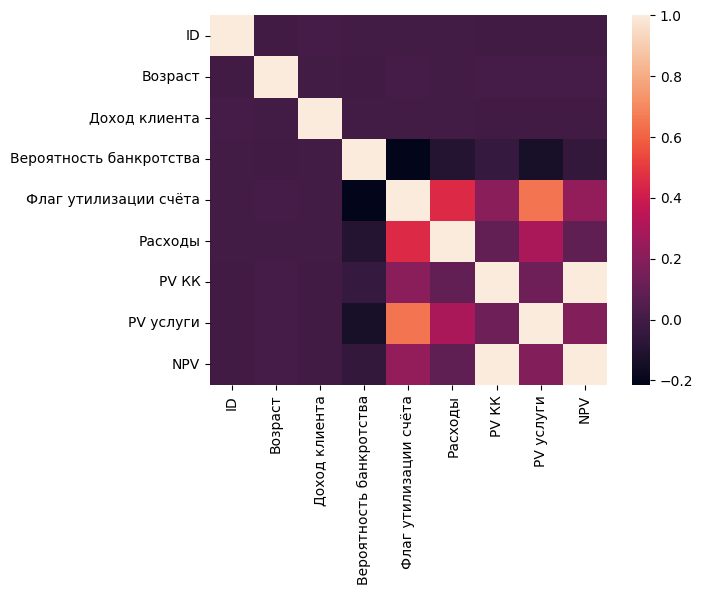

In [ ]:
sns.heatmap(data.corr())

Наибольшую корреляцию по модулю c метрикой имеют данные о вероятности банкротства. Эту метрики и выберем для однородности выборок.

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Вычислим дисперсию и среднее на исторических данных:

In [ ]:
alpha = 0.05
beta = 0.1
gamma = 0.08
variance = data['PV услуги'].var()
d = data['PV услуги'].mean() * gamma

Тогда минимальный размер выборки:

In [ ]:
size = (2 * variance * (norm.ppf(1.0 - alpha) - norm.ppf(beta)) ** 2) / (d ** 2)
round(size)

2232

### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
25291

In [ ]:
control = pd.read_csv('Контроль2.csv')
test = pd.read_csv('Тест2.csv')

### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

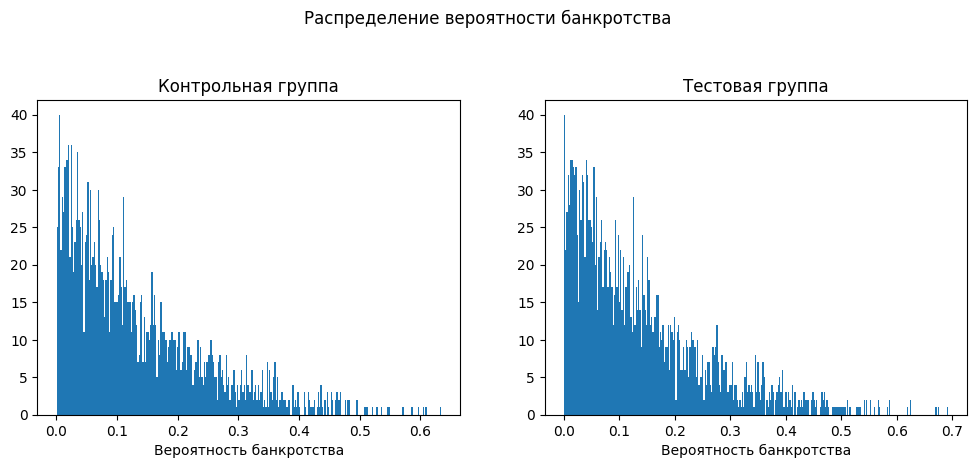

In [ ]:
fig = plt.figure(figsize=(12, 9))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(control['Вероятность банкротства'], bins=300)
plt.title('Контрольная группа')
plt.xlabel('Вероятность банкротства')

ax2 = plt.subplot(2, 2, 2, sharey = ax1)
ax2.hist(test['Вероятность банкротства'], bins=300)
plt.xlabel('Вероятность банкротства')

fig.suptitle('Распределение вероятности банкротства')
plt.title('Тестовая группа')
plt.show()

Чтобы проверить однородность, достаточно критерия Колмогорова-Смирнова.

In [ ]:
p_value = ks_2samp(test['Вероятность банкротства'], control['Вероятность банкротства']).pvalue

print(f'p-value: {p_value}')

if p_value < 0.02:
    print('Отвергаем нулевую гипотезу: выборки из разных распределений')
else:
    print('Принимаем нулевую гипотезу: выборки имеют одинаковое распределение')

p-value: 0.2514809636454333
Принимаем нулевую гипотезу: выборки имеют одинаковое распределение


Попробуем проверить по Леману-Розенблатту.

In [ ]:
p_value = cramervonmises_2samp(test['Вероятность банкротства'], control['Вероятность банкротства']).pvalue

print(f'p-value: {p_value}')

if p_value < 0.02:
    print('Отвергаем нулевую гипотезу: выборки из разных распределений')
else:
    print('Принимаем нулевую гипотезу: выборки имеют одинаковое распределение')

p-value: 0.20084624314703103
Принимаем нулевую гипотезу: выборки имеют одинаковое распределение


И по Манну-Уитни:

In [ ]:
p_value = mannwhitneyu(test['Вероятность банкротства'], control['Вероятность банкротства']).pvalue

print(f'p-value: {p_value}')

if p_value < 0.02:
    print('Отвергаем нулевую гипотезу: выборки из разных распределений')
else:
    print('Принимаем нулевую гипотезу: выборки имеют одинаковое распределение')

p-value: 0.13362413649052016
Принимаем нулевую гипотезу: выборки имеют одинаковое распределение


У нас нет оснований, чтобы отклонить нулевую гипотезу. То есть выборки имеют одинаковое распределение. Попробуем применить критерий и посмотреть на то, насколько метрики менялись в контрольной и тестовой группах.

Cначала посмотрим изменение метрики в динамике на тесте и контроле.

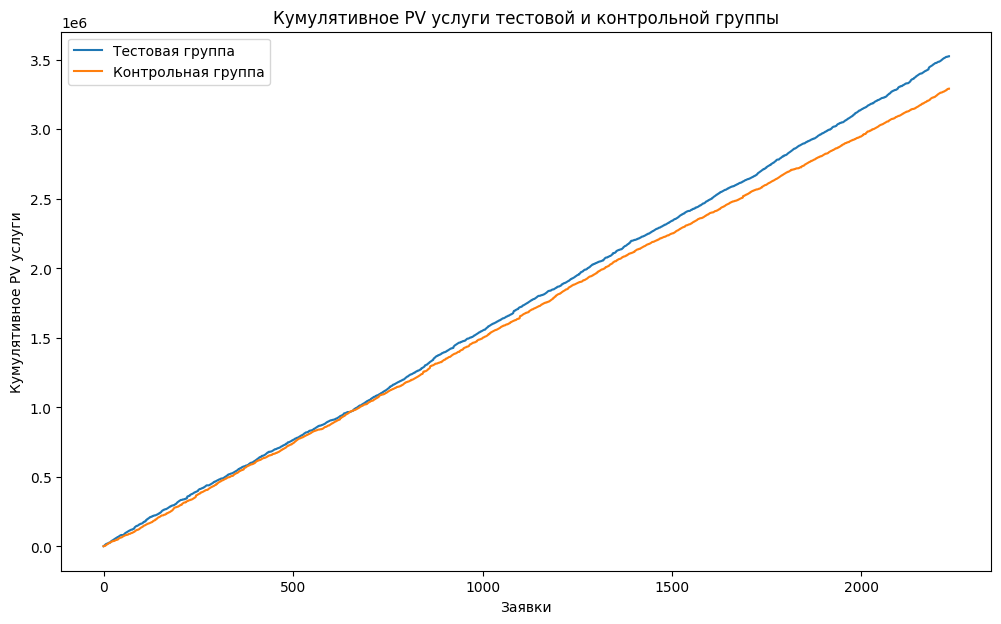

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(test['ID'], test['PV услуги'].cumsum(), label='Тестовая группа')
plt.plot(control['ID'], control['PV услуги'].cumsum(), label='Контрольная группа')
plt.title('Кумулятивное PV услуги тестовой и контрольной группы')
plt.ylabel('Кумулятивное PV услуги')
plt.xlabel('Заявки')
plt.legend()
plt.show()

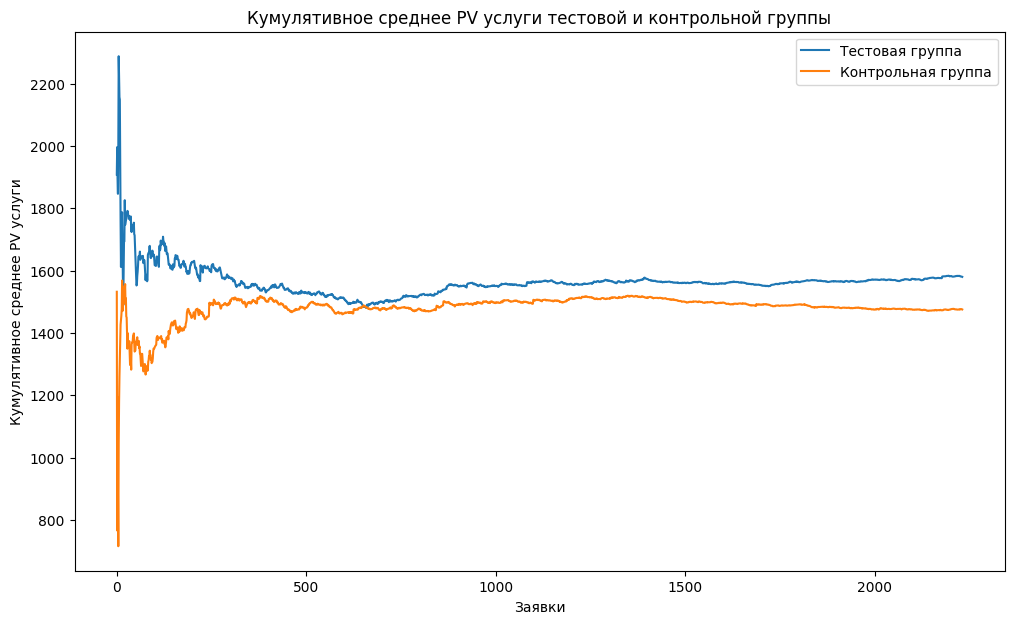

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(test['ID'], test['PV услуги'].expanding(min_periods=1).mean(), label='Тестовая группа')
plt.plot(control['ID'], control['PV услуги'].expanding(min_periods=1).mean(), label='Контрольная группа')
plt.title('Кумулятивное среднее PV услуги тестовой и контрольной группы')
plt.ylabel('Кумулятивное среднее PV услуги')
plt.xlabel('Заявки')
plt.legend()
plt.show()

Как мы видим, тестовая группа со временем демонстрировала все более высокий уровень кумулятивного PV услуги и сохраняла более высокое кумулятивное среднее PV услуги на протяжении большей части теста.

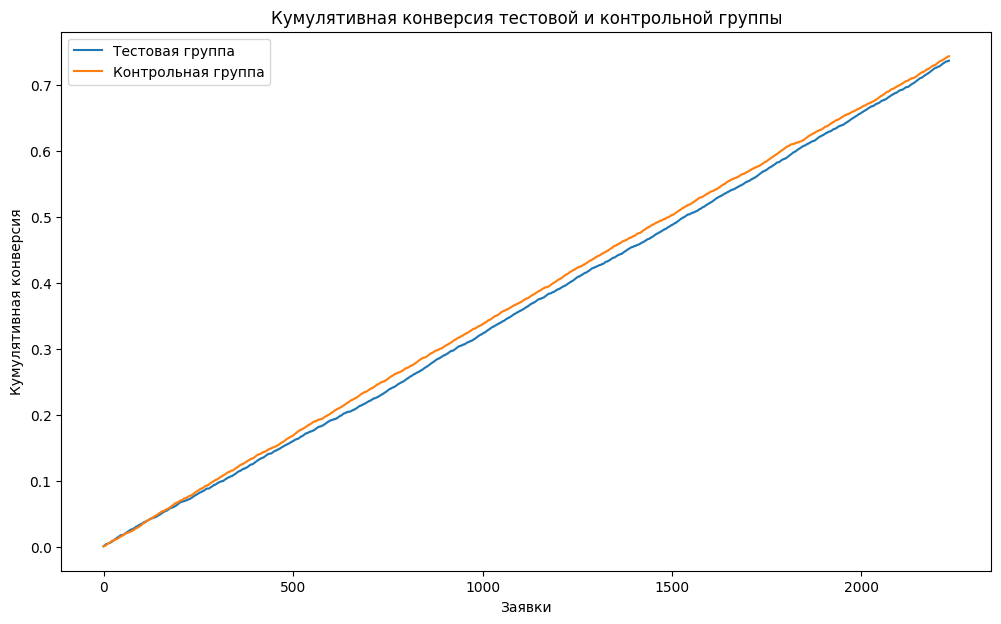

In [ ]:
control['cum_sale_flag'] = control['Флаг утилизации счёта'].cumsum()
test['cum_sale_flag'] = test['Флаг утилизации счёта'].cumsum()

plt.figure(figsize=(12, 7))

plt.plot(test['ID'], test['cum_sale_flag'] / len(control), label='Тестовая группа')
plt.plot(control['ID'], control['cum_sale_flag'] / len(control), label='Контрольная группа')
plt.title('Кумулятивная конверсия тестовой и контрольной группы')
plt.ylabel('Кумулятивная конверсия')
plt.xlabel('Заявки')
plt.legend()
plt.show()

Hа протяжении всего тестирования конверсия теста была примерно на том же уровне, что и контроля, то есть метрику мы не уронили – это хорошо.

Осталось посмотреть на распределение целевой метрики:

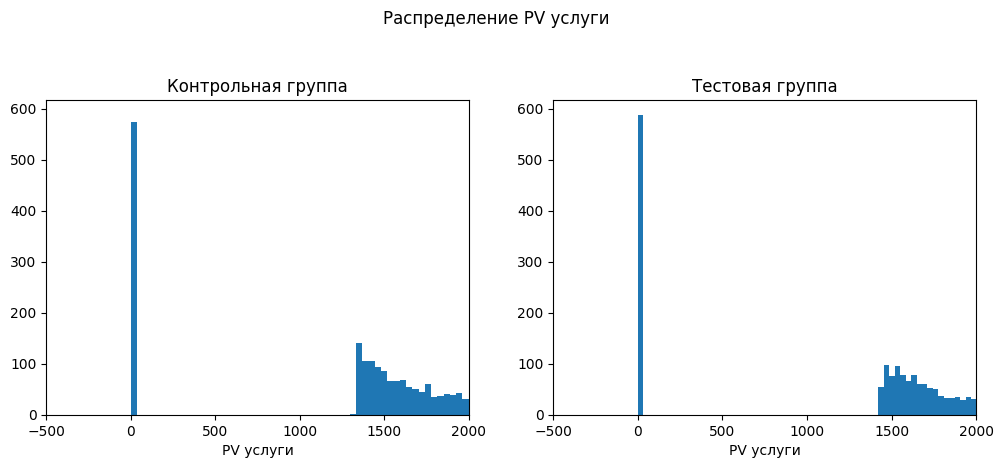

In [ ]:
fig = plt.figure(figsize=(12, 9))

ax1 = plt.subplot(2, 2, 1)
ax1.hist(control['PV услуги'], bins=400)
plt.xlim(-500, 2000)
plt.title('Контрольная группа')
plt.xlabel('PV услуги')

ax2 = plt.subplot(2, 2, 2, sharey = ax1)
ax2.hist(test['PV услуги'], bins=400)
plt.xlim(-500, 2000)
plt.xlabel('PV услуги')

fig.suptitle('Распределение PV услуги')
plt.title('Тестовая группа')
plt.show()

Посмотрим, можно ли отвергнуть нулевую гипотезу:

In [ ]:
stat, p_value = ttest_ind(test['PV услуги'], control['PV услуги'], alternative='greater')

percent = round(test['PV услуги'].mean()/control['PV услуги'].mean()-1, 3)

print(f'Процентное различие между средними равно {percent}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
    print('Не отвергаем нулевую гипотезу, средние можно считать равными')

Процентное различие между средними равно 0.071
p-value: 0.0023614136348334867
Отвергаем нулевую гипотезу: между выборками есть значимая разница


Мы отвергли нулевую гипотезу. То есть можно считать, что доходность нашего продукта действительно растет благодаря поднятию цен.